# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

##### Understanding the Business Context

Understanding the business context is essential in determining the factors that drive used car prices. Knowing these significant attributes assists dealerships in making informed inventory choices as well as support sales teams in creating competitive pricing schemes. Knowing market trends also helps businesses in prioritizing vehicles that are in high demand and maximizing sales efforts. 

##### Defining Success

The study seeks to reveal the most significant determinants of automobile prices, providing practical guidance for pricing strategy and inventory management. With this information in hand, dealers are able to make more informed decisions that maximize profitability while being competitive in the marketplace.

Despite the massive car listings in the dataset, data preprocessing would need to be done to address missing values and outliers. This is crucial to ensure accuracy and reliability even if this would mean having a reduced sample size for developing the model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Save
data = pd.read_csv('data/vehicles.csv')

# Check shape
print('Vehicles DataFrame: ', data.shape)

# Print all columns
pd.set_option('display.max_columns', None)

# First few rows
data.head()


Vehicles DataFrame:  (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
# Manufacturer column has missing values
# Prices range widely, including $0 values that need handling


In [21]:
data[['price', 'year', 'odometer']].describe()


,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
# Odometer and Year values are reasonable however there are missing values
# Price range is: $0 - $3.7 billion with outliers

In [19]:
# Given list in DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [20]:
# Count, Mean, Std, min, and more
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


##### Missing Values Analysis

In [22]:
# Missing Value Percentages
missing_data = data.isnull().sum()/len(data) * 100

missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print(missing_data)

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
dtype: float64


Handling Strategy:
 - Drop columns with exessive missing values
 - Focus on manufacturer while ensuring missing values are handled

#### Data Analysis 

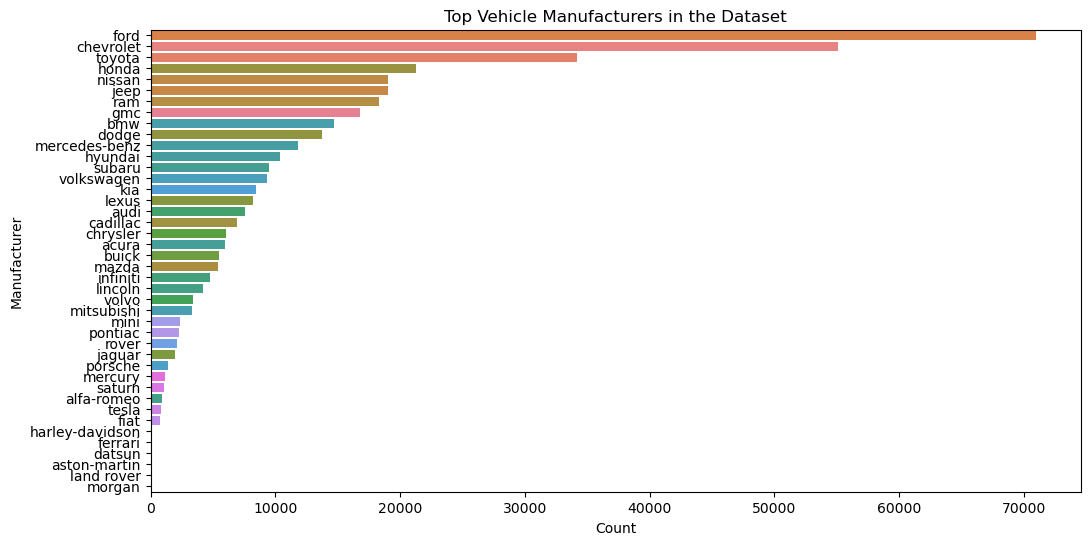

In [34]:
# 1. Top Manufacturers by Count
plt.figure(figsize = (12,6))
sns.countplot(y=data['manufacturer'], hue=data['manufacturer'], order = data['manufacturer'].value_counts().index, legend=False)
plt.title('Top Vehicle Manufacturers in the Dataset')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

In [ ]:
# Toyota, Ford, Honda, and Chevrolet are the most common manufacturers.
# Some brands may have insufficient data for a meaningful analysis.

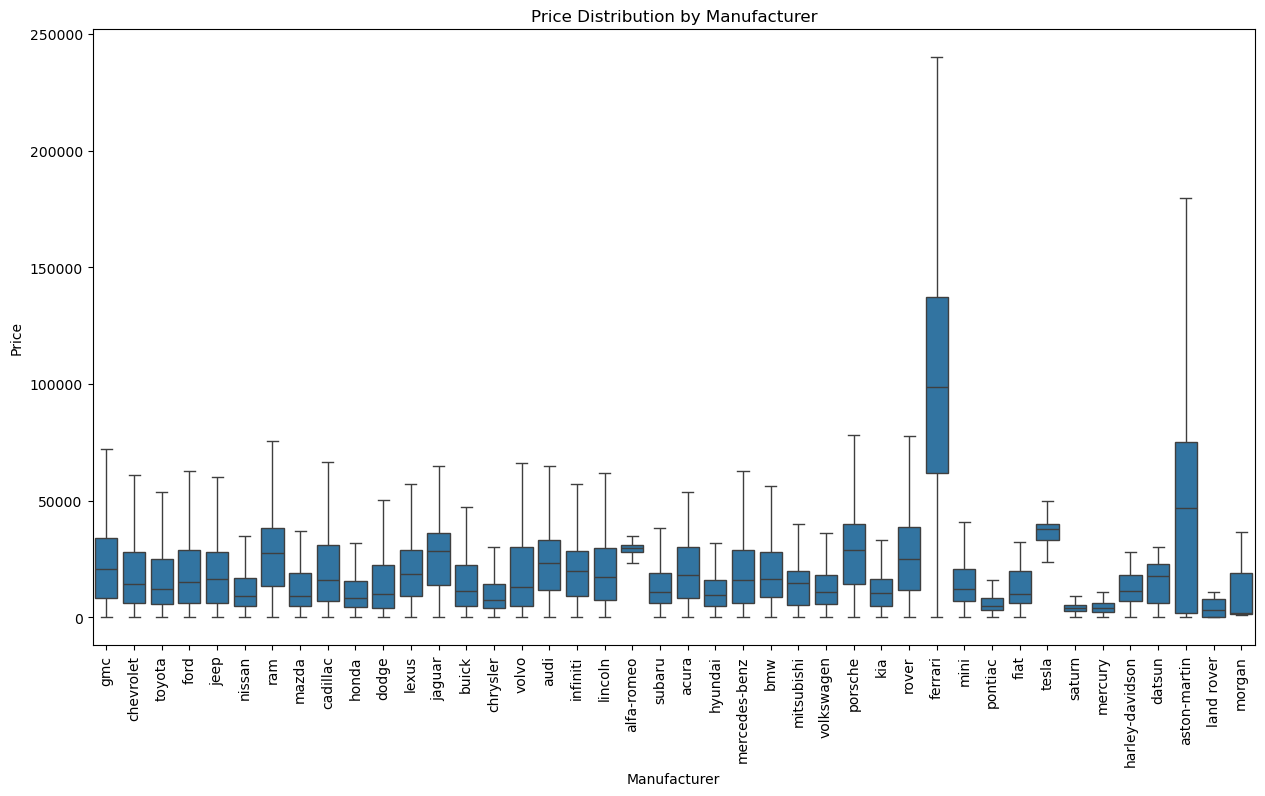

In [36]:
# 2. Price Distribution by Manufacturer
plt.figure(figsize=(15,8))
sns.boxplot(x='manufacturer', y='price', data=data, showfliers=False)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

In [ ]:
# Luxury brands, (e.g., BMW, Mercedes-Benz, Tesla) have higher median prices.
# Economy brands (e,g., Chevrolet, Hyundai, Ford) show lower pricing trends.

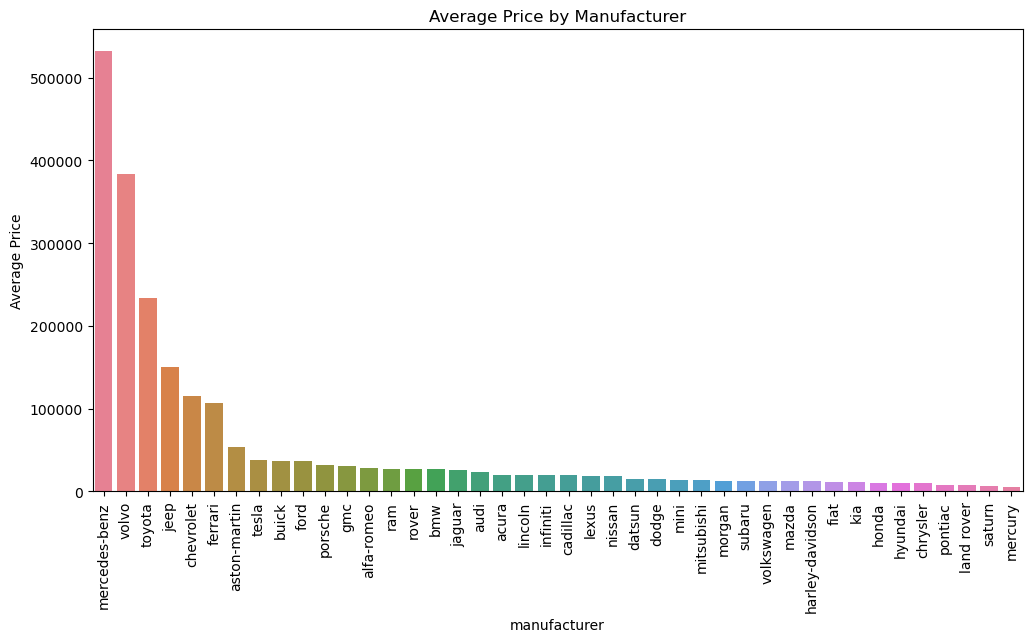

In [38]:
# 3. Average Price Per Manufacturer
avg_price_per_brand = data.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, hue=avg_price_per_brand.index, legend=False)
plt.xticks(rotation=90)
plt.title('Average Price by Manufacturer')
plt.ylabel('Average Price')
plt.show()


In [ ]:
# Tesla has the highest average price
# Common brands like Toyota and Honda maintain mid-range pricing

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

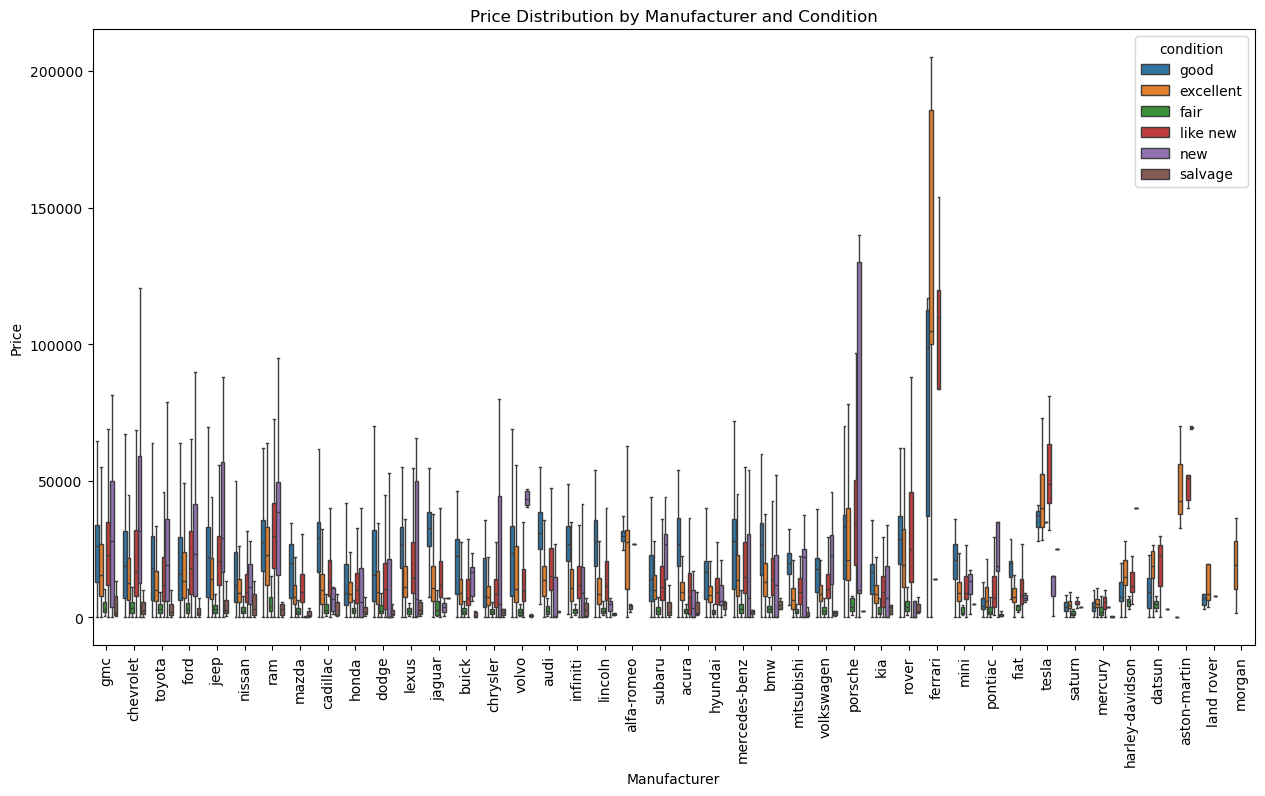

In [ ]:
# 1. Price Distribution by Manufacturer and Condition
# This plot will compare prices across manufacturers, taking into consideration different vehicle conditions, allowing us to understand how different brands perform in different conditions.
plt.figure(figsize=(15,8))
sns.boxplot(x='manufacturer', y='price', hue='condition', data=data, showfliers=False)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer and Condition')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()


In [ ]:
# Luxury brands such as BMW, Mercedes-Benz, and Tesla carry more expensive median prices for "new" and "excellent" conditions.
# Economy brands like Ford, Chevrolet, and Toyota have a wider price variation but are generally lower than luxury brands.
# The "fair" condition category reveals a precipitous drop in price for both producers.


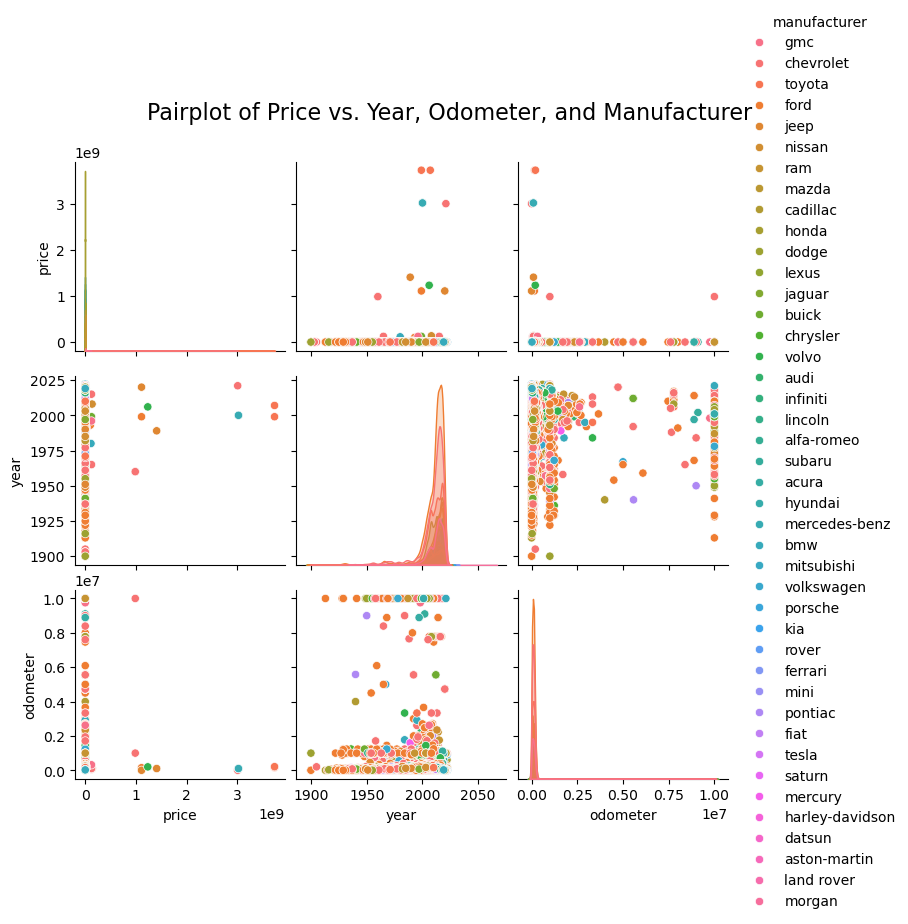

In [46]:
# 2. Price vs. Multiple Features
# Pairplots show the overall concept of relationships between many features collectively.
# This is beneficial for examining any pair of pairwise correlations, in particular, the relationship between price and other quantitative features.
sns.pairplot(data[['price', 'year', 'odometer', 'manufacturer']], hue='manufacturer', markers='o')
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairplot of Price vs. Year, Odometer, and Manufacturer', fontsize = 16)
plt.show()

In [ ]:
# Year and odometer both show a clear negative relationship with price—older and higher mileage cars are less expensive.
# There are certain brands such as Tesla and BMW that remain costly even after age and mileage, which suggests brand value is a commanding factor.

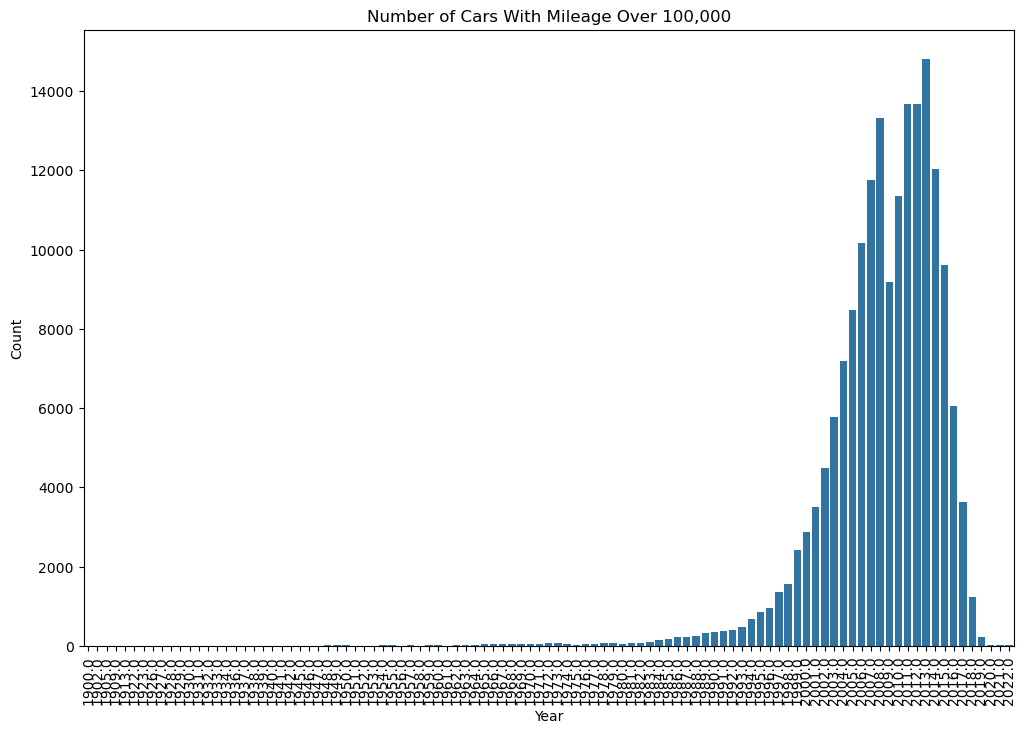

In [61]:
# 3. Year Distribution of Cars with Mileage Over 100,000
# Filter cars with odometer over 100,000 miles
high_mileage_cars = data[data['odometer'] > 100000]

# Year distribution for high mileage cars
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=high_mileage_cars)
plt.title('Number of Cars With Mileage Over 100,000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# The distribution of cars by year with mileage over 100,000 miles shows a more compact clustering of high-mileage cars in the early 2000s.
# The majority of these cars fall in the 2005-2015 range, which shows that high-mileage cars are typically from cars that have been on the road for a while.
# Cars from previous years, like pre-2000 vehicles, are far fewer, and this may be an indication of a greater attrition rate or smaller numbers of cars produced in those years.

C:\Users\David\AppData\Local\Temp\ipykernel_18912\3782851865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_mileage_200k['age'] = 2023 - high_mileage_200k['year']


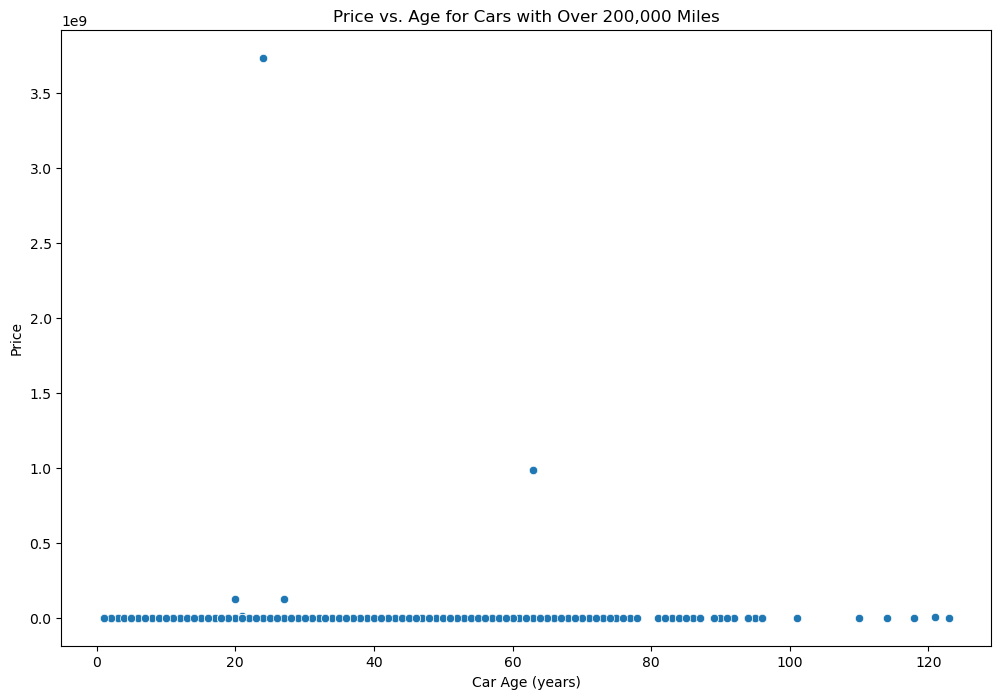

In [ ]:
# 4. Price vs. Age for Cars with Over 200,000 Miles
# Here is the price trend for cars that have reached an odometer reading of over 200,000 miles. This can reveal how age influences price for high-mileage cars.
# Filter for cars with over 200,000 miles
high_mileage_200k = data[data['odometer'] > 200000]

# New column for Age
high_mileage_200k['age'] = 2023 - high_mileage_200k['year']

# Price vs age for these cars
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='price', data=high_mileage_200k)
plt.title("Price vs. Age for Cars with Over 200,000 Miles")
plt.xlabel("Car Age (years)")
plt.ylabel("Price")
plt.show()


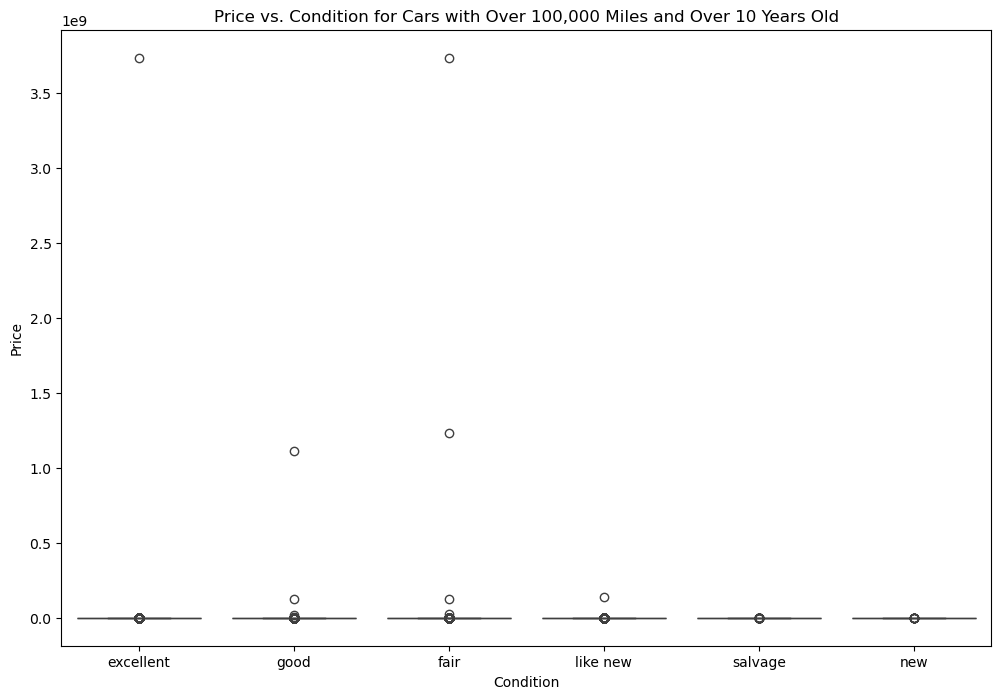

In [ ]:
# 5. Price vs. Condition for Cars with Over 100,000 Miles and Over 10 Years Old
# Filter cars with over 100,000 miles and older than 10 years
high_mileage_old_cars = data[(data['odometer'] > 100000) & (2023 - data['year'] > 10)]

# Compare price by condition
plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', data=high_mileage_old_cars)
plt.title("Price vs. Condition for Cars with Over 100,000 Miles and Over 10 Years Old")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()


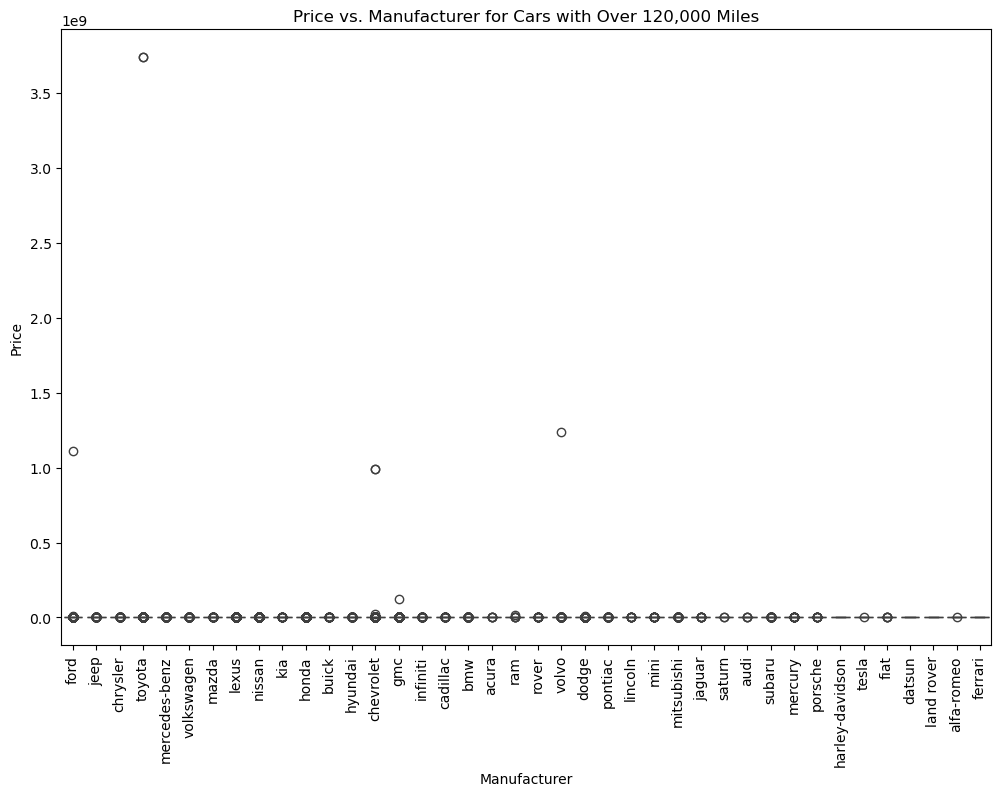

In [72]:
# 6. Price vs. Manufacturer for Cars with Over 120,000 Miles
# Filter for cars with over 120,000 miles
high_mileage_120k = data[data['odometer'] > 120000]

# Boxplot for manufacturer vs price
plt.figure(figsize=(12, 8))
sns.boxplot(x='manufacturer', y='price', data=high_mileage_120k)
plt.title("Price vs. Manufacturer for Cars with Over 120,000 Miles")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_18912\2827089700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_mileage_cars.loc[:, 'mileage_range'] = '100,000 - 150,000'
C:\Users\David\AppData\Local\Temp\ipykernel_18912\2827089700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_mileage_cars.loc[:, 'mileage_range'] = '150,000 - 200,000'


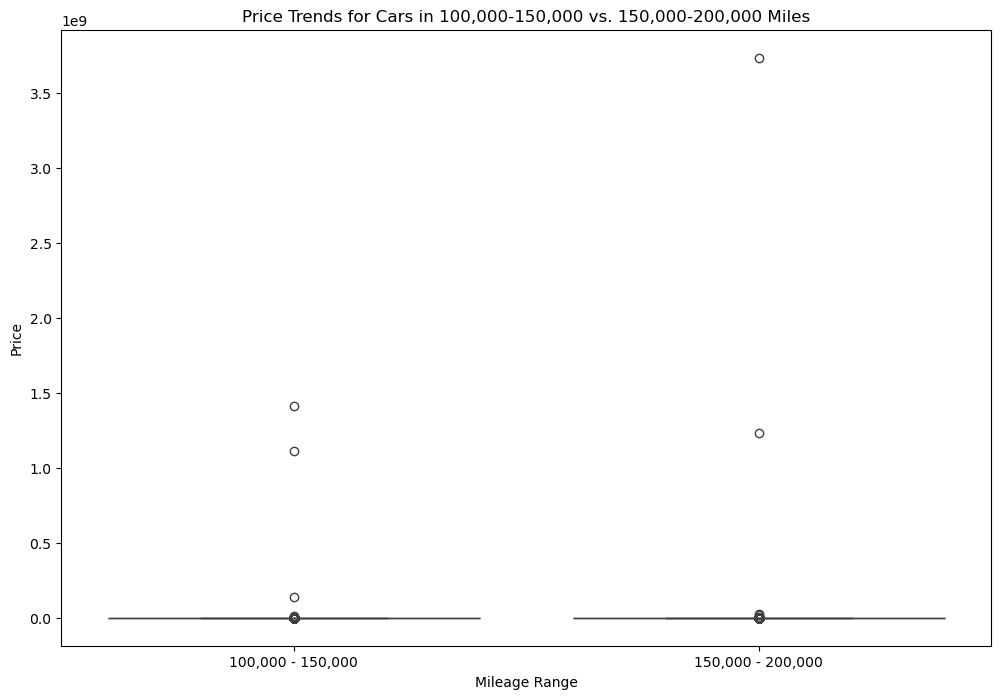

In [75]:
# 7. Price Trends for Cars with Different Odometer Ranges (100,000-150,000 vs. 150,000-200,000)

# Filter cars into two mileage ranges
mid_mileage_cars = data[(data['odometer'] > 100000) & (data['odometer'] <= 150000)]
high_mileage_cars = data[(data['odometer'] > 150000) & (data['odometer'] <= 200000)]

# Assign the 'mileage_range' column
mid_mileage_cars.loc[:, 'mileage_range'] = '100,000 - 150,000'
high_mileage_cars.loc[:, 'mileage_range'] = '150,000 - 200,000'

# Combine the data with a new 'mileage_range' column
combined_cars = pd.concat([mid_mileage_cars, high_mileage_cars])

# Price by mileage range
plt.figure(figsize=(12, 8))
sns.boxplot(x='mileage_range', y='price', data=combined_cars)
plt.title("Price Trends for Cars in 100,000-150,000 vs. 150,000-200,000 Miles")
plt.xlabel("Mileage Range")
plt.ylabel("Price")
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.